In [5]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.fftpack import fft

In [6]:
# Load data and print the classes
data = np.load("gesture_dict.npy",allow_pickle=True)
data.item().keys()

dict_keys(['Letter A', 'Letter B', 'Letter C', 'Letter D'])

Letter A (10, 125, 3)


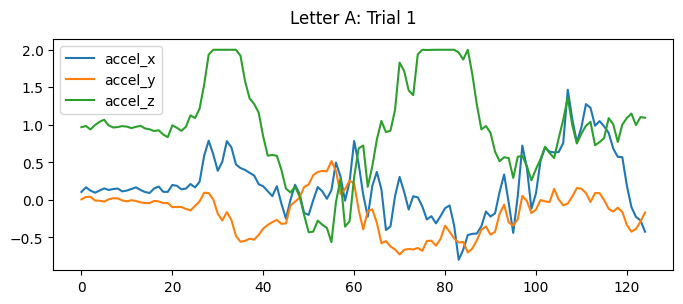

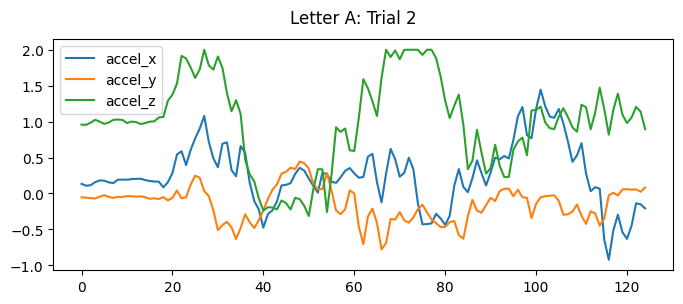

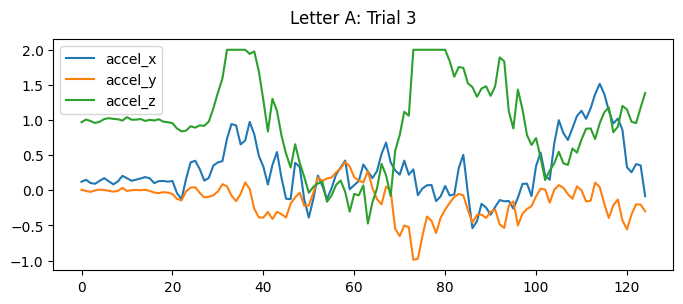

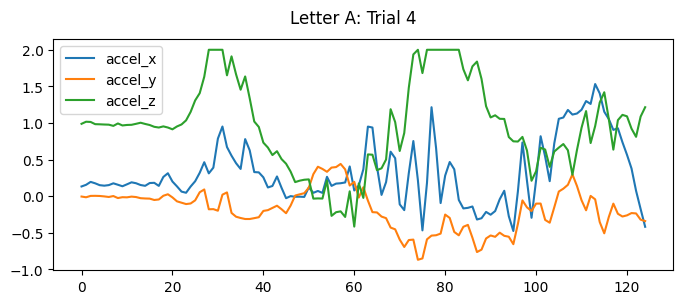

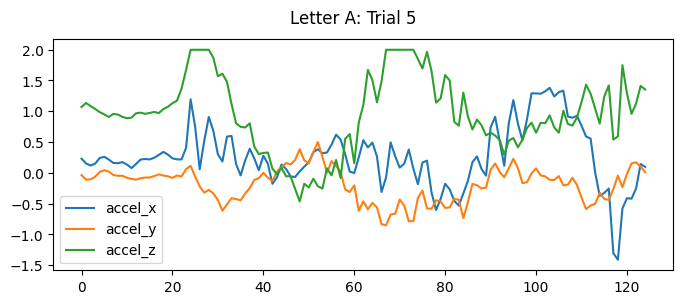

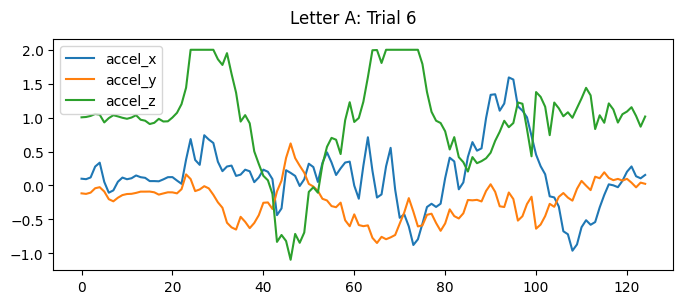

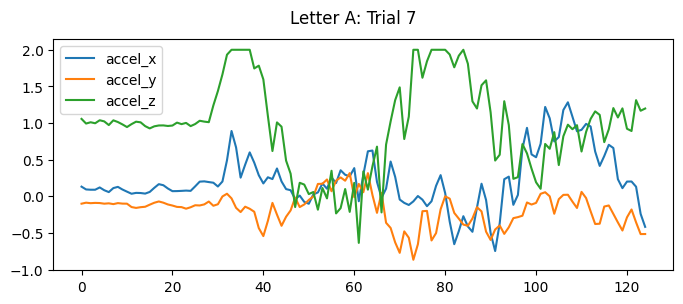

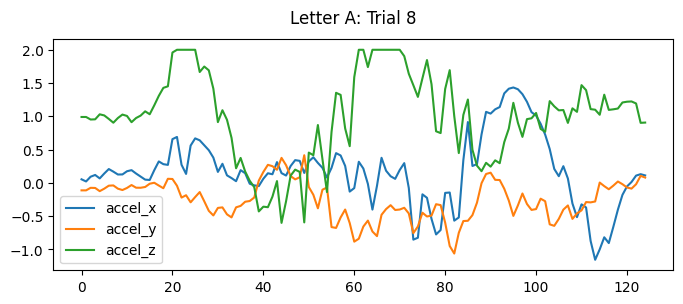

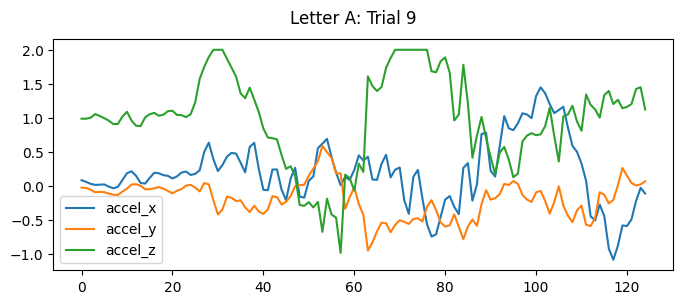

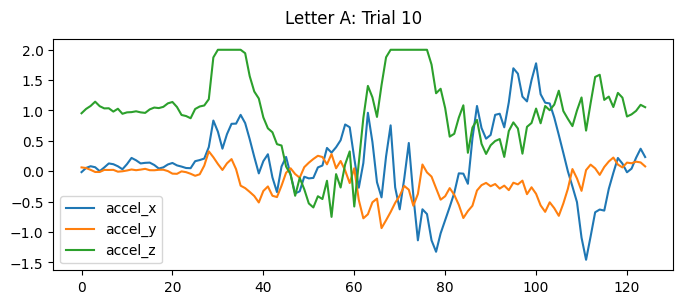

Letter B (10, 125, 3)


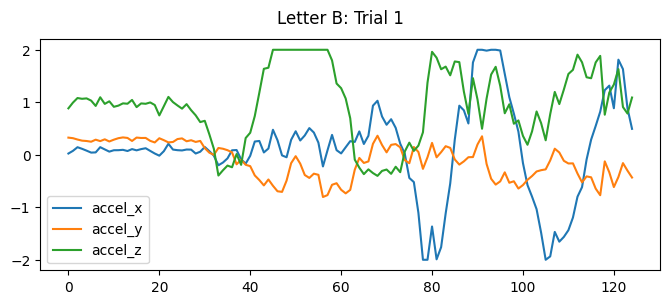

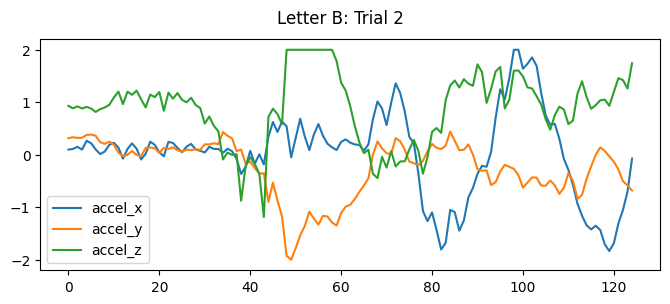

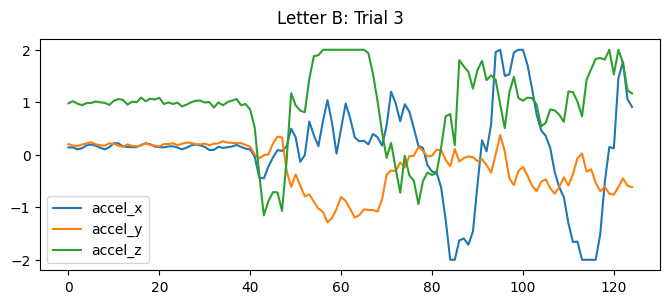

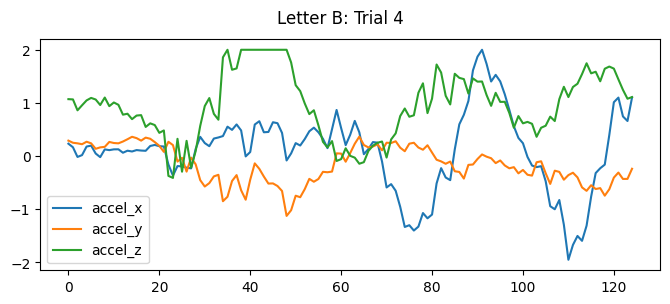

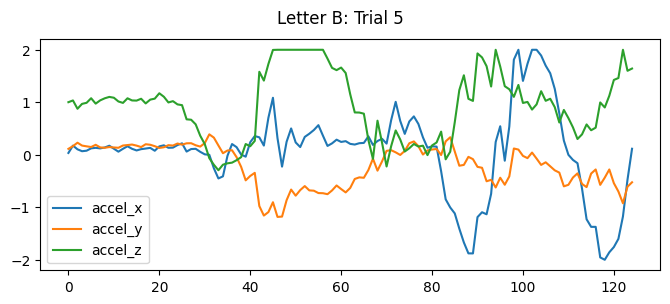

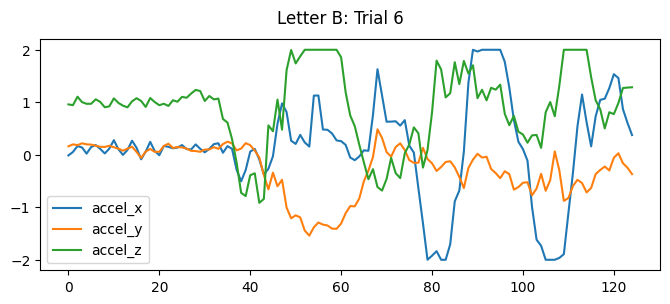

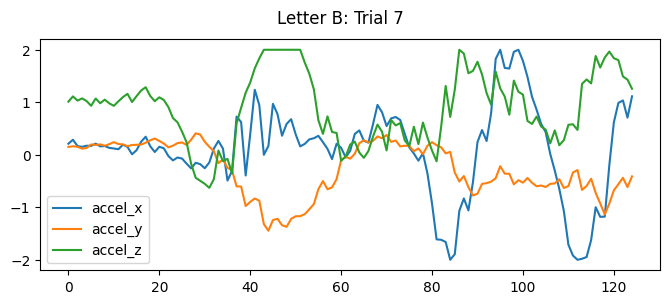

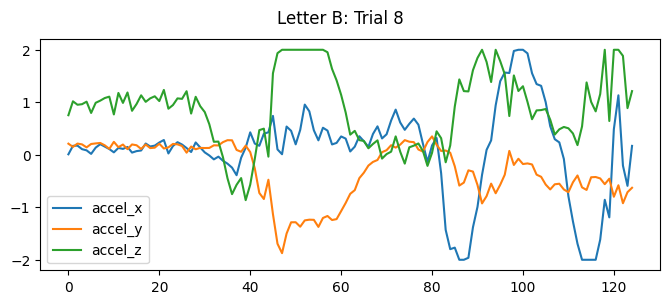

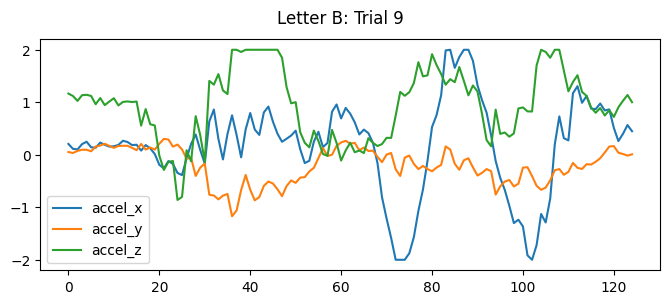

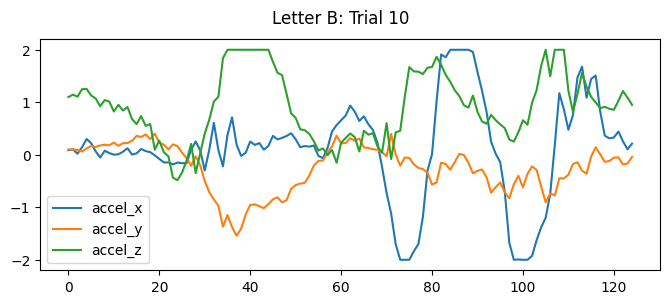

Letter C (10, 125, 3)


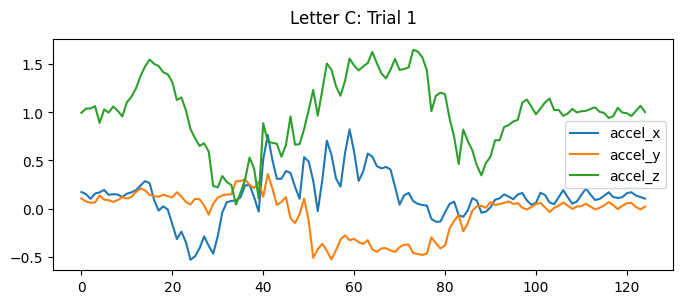

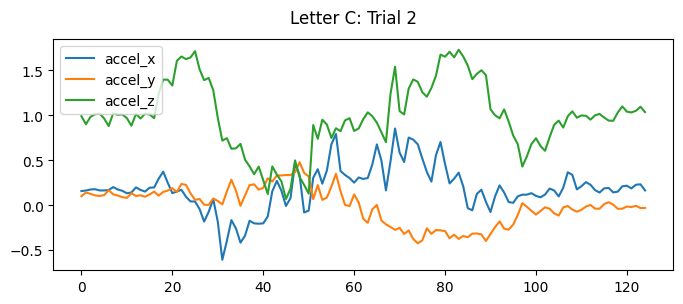

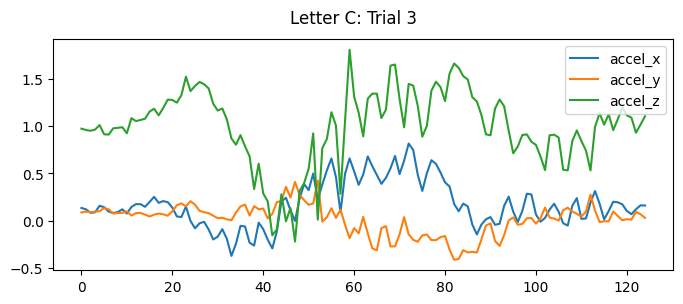

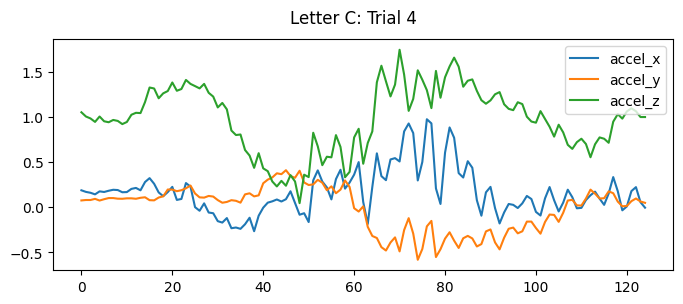

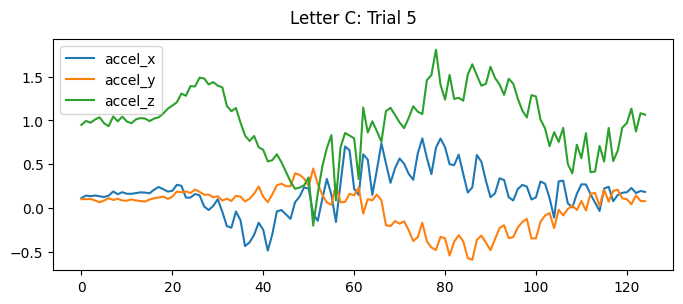

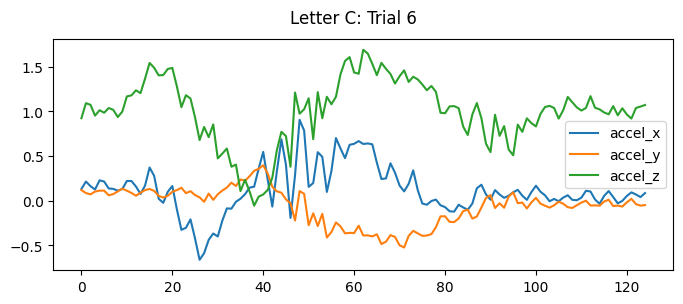

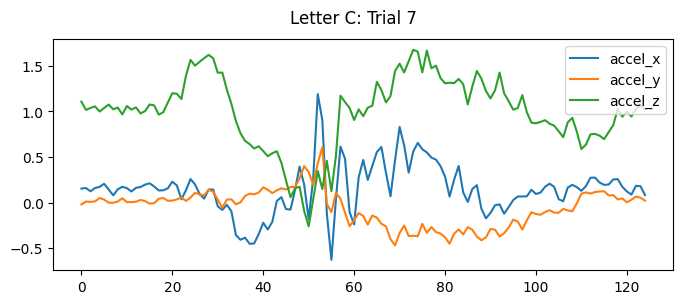

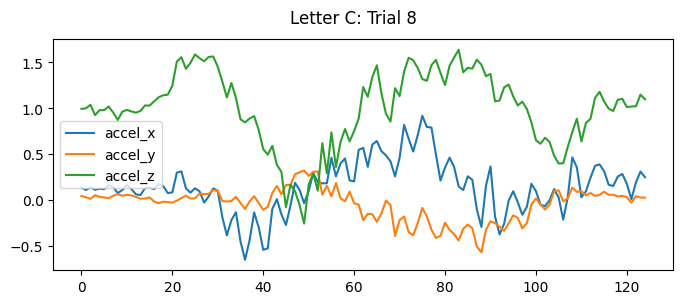

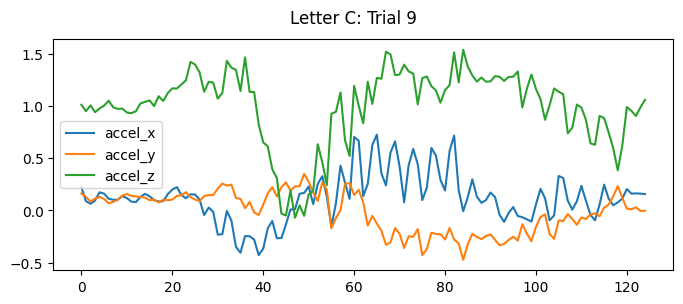

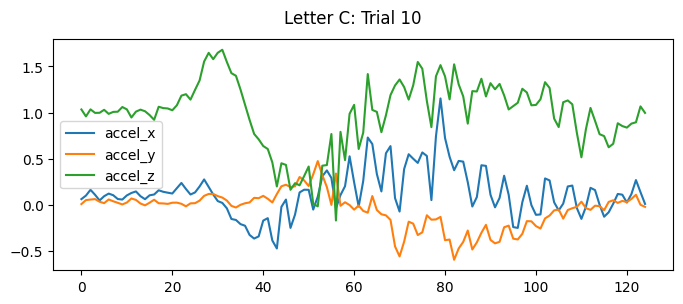

Letter D (10, 125, 3)


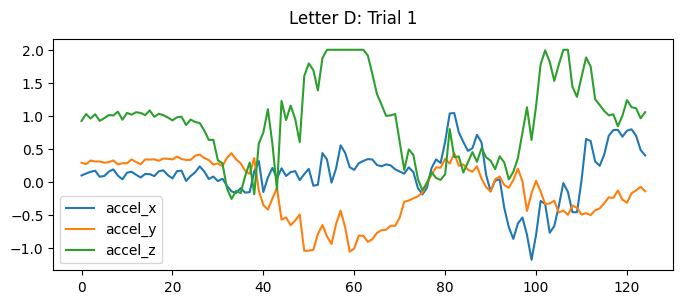

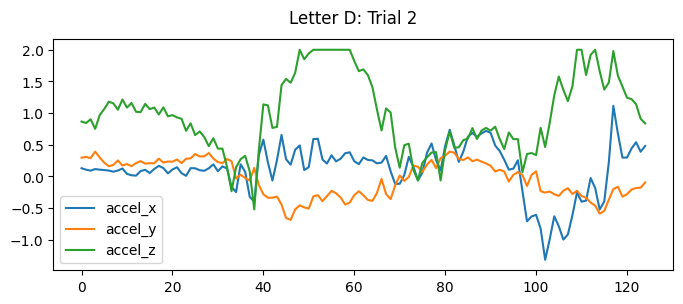

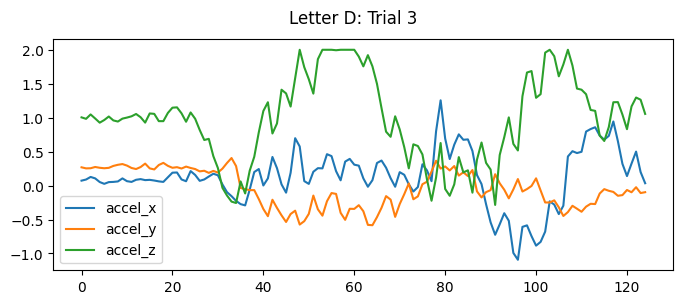

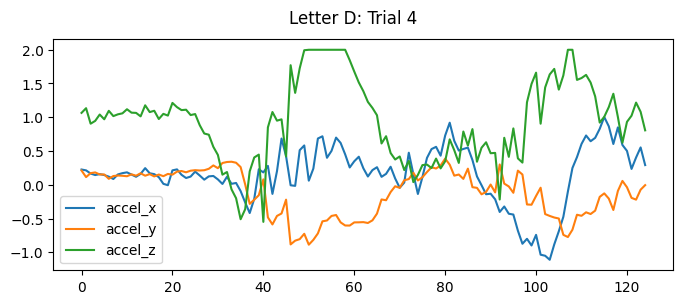

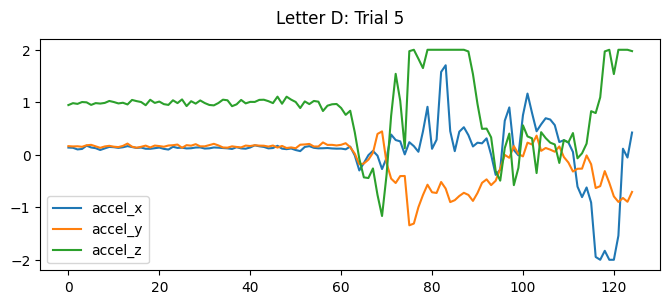

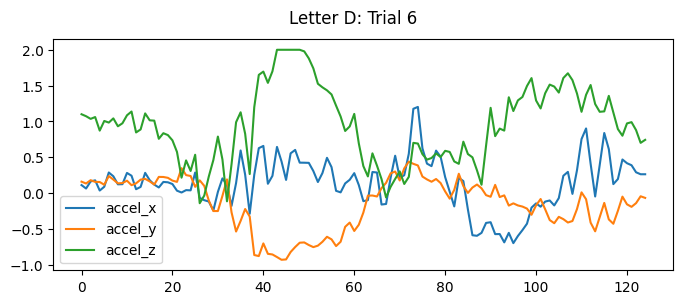

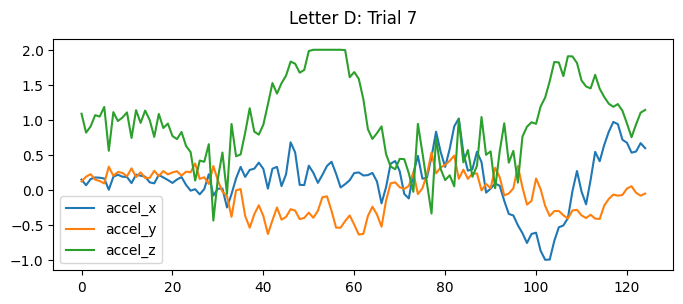

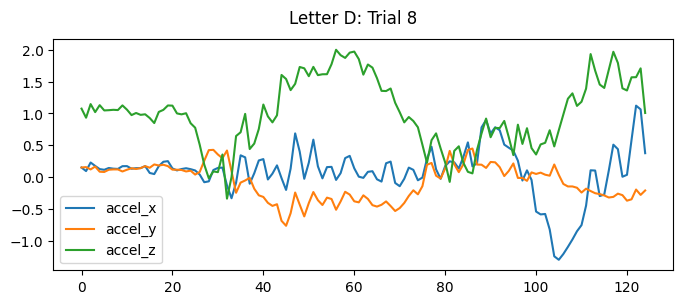

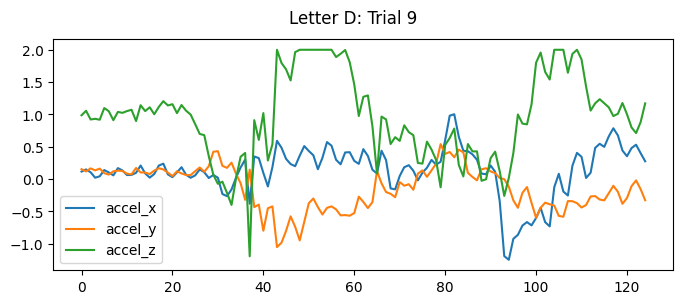

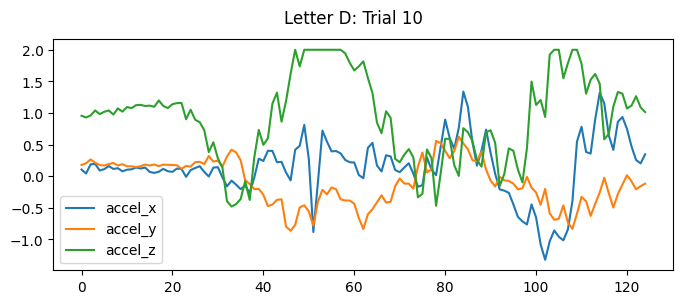

In [7]:
#Code to visualize the different classes
for gesture_key in data.item().keys():
    data_arr = np.array(data.item().get(gesture_key))
    print(gesture_key,data_arr.shape) # Array shape should be n_trials, n_samples, values
    for i in range(len(data_arr)):
        accel = data_arr[i]
        fig, (ax1) = plt.subplots(1, 1,figsize=(8,3))
        fig.suptitle(gesture_key + ": Trial " + str(i+1))
        ax1.plot(accel[:,0],label="accel_x")
        ax1.plot(accel[:,1],label="accel_y")
        ax1.plot(accel[:,2],label="accel_z")
        ax1.legend()
        plt.show() 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

def featurize(arr):
    # calcualte fft for axes
    # need absolute value since fft is complex
    x = np.abs(fft(arr[:, 0]))
    y = np.abs(fft(arr[:, 1]))
    z = np.abs(fft(arr[:, 2]))

    # get top two freq val w highest magnitudes
    # reduces dimensionality, improves robustness
    two_x = np.argsort(x)[-2:]
    two_y = np.argsort(y)[-2:]
    two_z = np.argsort(z)[-2:]

    # combine all into single array as our feature vector
    features = np.concatenate([x[two_x], y[two_y], z[two_z]])
    print(features.shape)
    return features

gesture_dict = data.item()
loo = LeaveOneOut()
X = []
Y = []
for key in gesture_dict.keys():
    gest_trials = gesture_dict[key]
    for trial in gest_trials:
        X.append(featurize(trial))
        Y.append(key)
X = np.array(X)
Y = np.array(Y)

classifiers = [SVC(kernel='poly'),KNeighborsClassifier(),RandomForestClassifier()]

for clf_model in classifiers:
    accuracy = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf_model.fit(X_train, y_train)
        accuracy.append(clf_model.score(X_test, y_test))
    print("Leave one trial out cross-val accuracy for",clf_model,"is", np.mean(accuracy))

(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
Leave one trial out cross-val accuracy for SVC(kernel='poly') is 1.0
Leave one trial out cross-val accuracy for KNeighborsClassifier() is 0.975
Leave one trial out cross-val accuracy for RandomForestClassifier() is 1.0
